In [5]:
# import the modules that we need and specify the folder which contains the files
import pandas as pd
import glob, os
import mahotas as mh
import numpy as np
import matplotlib as mpl

from pylab import imshow
from skimage import io
import skimage
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'

filepath = 'materials/'

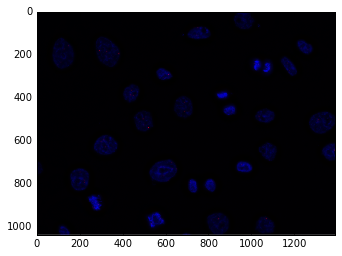

In [12]:
image = io.imread(filepath + 'FISHrgb.tif')
imshow(image)

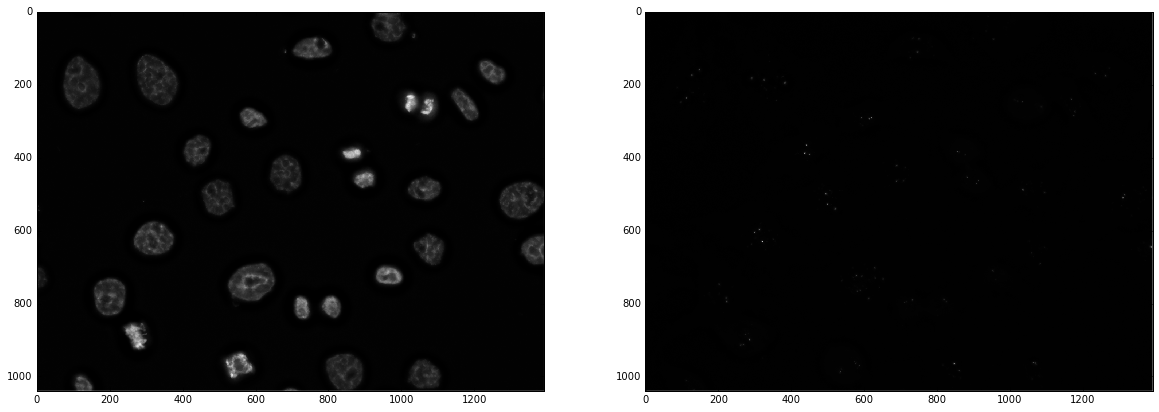

In [13]:
DNA = image[..., 2]
chr7 = image[...,0]

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 15))
ax1.imshow(DNA)
ax2.imshow(chr7)

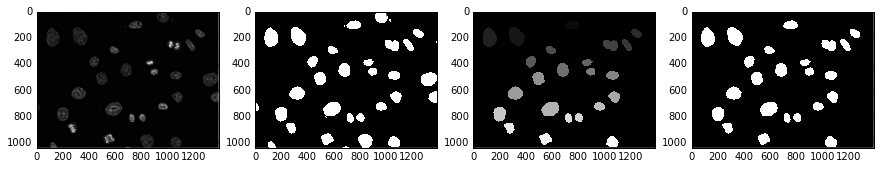

In [14]:
DNAf = mh.gaussian_filter(DNA, 1)
DNAf = (DNAf > DNAf.mean())

labeled, numberOfNuclei = mh.label(DNAf)
original_label = labeled

max_size = 20000
min_size = 500

sizes = mh.labeled.labeled_size(labeled)

too_big = np.where(sizes > max_size)
labeled = mh.labeled.remove_regions(labeled, too_big)

too_small = np.where(sizes < min_size)
labeled = mh.labeled.remove_regions(labeled, too_small)

# Remove cells at the borders
labeled = mh.labeled.remove_bordering(labeled)

# Relabel everthing
relabeled, n_nuclei = mh.labeled.relabel(labeled)

relabeledf = (relabeled > 0)

fig, (ax_original, ax_filter, ax_label, ax_relabel) = plt.subplots(ncols = 4, figsize = (15,10))
ax_original.imshow(DNA, cmap = 'gray')
ax_filter.imshow(DNAf, cmap = 'gray')
ax_label.imshow(relabeled)
ax_relabel.imshow(relabeledf)

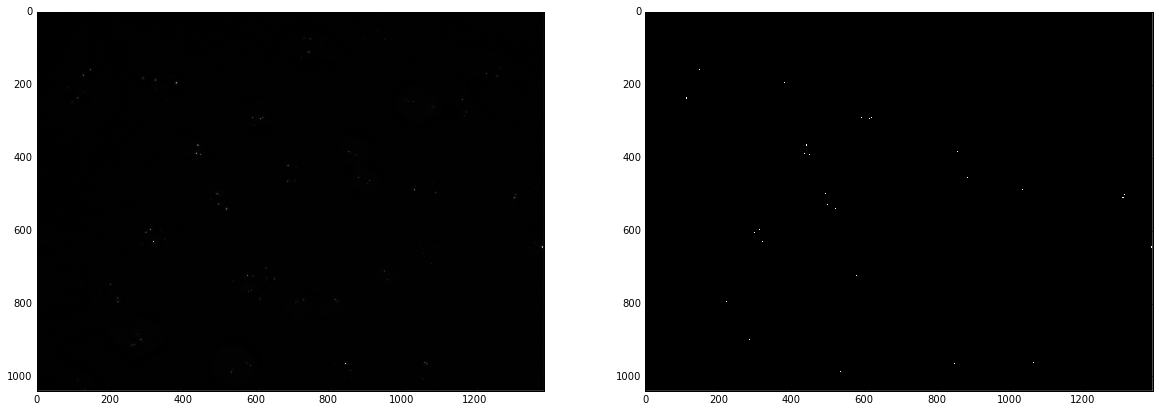

In [15]:
from skimage.filters import threshold_otsu

chr7_binary = chr7 > 50

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 15))
ax1.imshow(chr7)
ax2.imshow(chr7_binary)

In [16]:
list = []

for i in np.arange(1, int(n_nuclei)):
    mask = relabeled == i
    chromosomes, nOfChromosome = mh.label(mask & chr7_binary)
    list.append(int(nOfChromosome))

print(list)

[2, 3, 3, 2, 1, 0, 3, 3, 1, 2, 1, 2, 3, 3, 1, 4, 1, 3, 2, 1, 3, 2]
